# Customer Churn Prediction

## 1. Introduction: 

- Customer churn (also known as customer attrition) is the loss of clients or customers. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. In this project, we will build a machine learning model to predict customer churn.

## 2. Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#for feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score



pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

## 3. Read dataset

In [3]:
df = pd.read_csv('/Users/mac/Desktop/DataScience/Pojects_ds/Customer Churn/Churn_Modelling.csv')

## 4. Exploratory Data Analysis

- Getting to know the data.

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

### 4.1 Finding out the shape

In [5]:
df.shape

(10000, 14)

### 4.2 Finding out the null values

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- Not a single null value.

### 4.3 Info 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 4.4 Checking if there is any duplicate rows or not

In [8]:
df.duplicated().sum()

0

- There are no duplicate rows.

### 4.5 Statistical Properties of Dataset

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Data Analysis 

#### Q1 - what is percentage of retained country customer?

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
#total number of customers
df_total_cust = df['Geography'].value_counts()

#retained customers
df_retained = df[df['Exited']==0]['Geography'].value_counts()

#% of cust retained:
(df_retained/df_total_cust)*100

France     83.845233
Germany    67.556796
Spain      83.326605
Name: Geography, dtype: float64

- Observation: Germany has the lowest retention rate (67%)

In [51]:
#total number of customers
df_total_cust = df['Geography'].value_counts()

#retained customers
df_exited = df[df['Exited']==1]['Geography'].value_counts()

#% of cust retained:
(df_exited/df_total_cust)*100

France     16.154767
Germany    32.443204
Spain      16.673395
Name: Geography, dtype: float64

In [31]:
pd.pivot_table(data=df,index=['Geography','Gender','Exited'],aggfunc={'Balance':np.mean,'Gender':'count'})

Balance  Gender
Geography Gender Exited                       
France    Female 0        58424.310061    1801
                 1        67755.162630     460
          Male   0        61774.503758    2403
                 1        75710.827800     350
Germany   Female 0       118828.514362     745
                 1       119673.872321     448
          Male   0       119896.529105     950
                 1       121202.242432     366
Spain     Female 0        56594.820688     858
                 1        71997.673680     231
          Male   0        61871.626285    1206
                 1        73167.867802     182

In [71]:
pd.pivot_table(data=df,index=['Geography','Exited'],
               aggfunc={'Balance':np.mean,'EstimatedSalary':np.mean,'NumOfProducts':'count'})

Balance  EstimatedSalary  Gender  NumOfProducts
Geography Exited                                                       
France    0        60339.275678     99217.097331    4204           4204
          1        71192.795728    103439.278296     810            810
Germany   0       119427.106696    102414.657876    1695           1695
          1       120361.075590     98403.886450     814            814
Spain     0        59678.070470     98602.369864    2064           2064
          1        72513.352446    103629.554818     413            413

In [75]:
pd.pivot_table(data=df,index=['Geography','Gender','Exited'],
               aggfunc={'Balance':np.mean,'EstimatedSalary':np.mean})

Balance  EstimatedSalary
Geography Gender Exited                                
France    Female 0        58424.310061     98526.820627
                 1        67755.162630    103626.025065
          Male   0        61774.503758     99734.445789
                 1        75710.827800    103193.839686
Germany   Female 0       118828.514362    103987.042242
                 1       119673.872321     99884.458728
          Male   0       119896.529105    101181.577505
                 1       121202.242432     96591.601257
Spain     Female 0        56594.820688     98900.649091
                 1        71997.673680    107544.095758
          Male   0        61871.626285     98390.161260
                 1        73167.867802     98661.099011

### Points:
1. People who have exited have less estimated salary and the Services provided by bank
   taken by them is more.
   
2. In France(Male and Female both) people with more estimated salary with more balance have left the Bank.          Similarly is for Spain (only female). 

#### Q2. Checking the state of the Exiters whether they have credit card and were an active users or not.

In [94]:
total_exited = df[df['Exited']==1]['Geography'].value_counts()
mem_exited_haveCreditCard_wereActiveUsers = df[(df['Exited']==1) &
                                               (df['HasCrCard']==1) &
                                               (df['IsActiveMember']==1)]['Geography'].value_counts()

d=(mem_exited_haveCreditCard_wereActiveUsers/total_exited)*100
pd.concat([mem_exited_haveCreditCard_wereActiveUsers,total_exited,d],axis=1,
          keys=['exiters who were active members and had credit card','total exiters','ratio'])

,exiters who were active members and had credit card,total exiters,ratio
Germany,199,814,24.447174
France,195,810,24.074074
Spain,88,413,21.307506


- Observation:Germany has the highest percentage of exiters but its mostly the same as France in ratio.But in Spain its not the case most of the members were retained.

#### Q3. checking the state of exiters with num of products for each country

In [96]:
Num_OF_EXITERS_f = df[(df['Exited']== 1) & (df['Geography']=='France')]['NumOfProducts'].value_counts()
Num_OF_EXITERS_g = df[(df['Exited']== 1) & (df['Geography']=='Germany')]['NumOfProducts'].value_counts()
Num_OF_EXITERS_s = df[(df['Exited']== 1) & (df['Geography']=='Spain')]['NumOfProducts'].value_counts()
total_f = df[(df['Geography']=='France')]['NumOfProducts'].value_counts()
total_g = df[(df['Geography']=='Germany')]['NumOfProducts'].value_counts()
total_s = df[(df['Geography']=='Spain')]['NumOfProducts'].value_counts()
p_f= Num_OF_EXITERS_f / total_f * 100
p_g= Num_OF_EXITERS_g / total_g * 100
p_s= Num_OF_EXITERS_s / total_s * 100

In [99]:
print('For France')

pd.concat([Num_OF_EXITERS_f, total_f,p_f], axis=1, 
           keys=['Num of exiters', 'total number of country custumers','percentage of exiters'])

For France


,Num of exiters,total number of country custumers,percentage of exiters
1,564,2514,22.434368
2,135,2367,5.703422
3,82,104,78.846154
4,29,29,100.000000


In [100]:
print('For Germany')
pd.concat([Num_OF_EXITERS_g, total_g,p_g],
          axis=1, keys=['Num of exiters', 'total number of country custumers','percentage of exiters'])

For Germany


,Num of exiters,total number of country custumers,percentage of exiters
1,578,1349,42.846553
2,126,1040,12.115385
3,86,96,89.583333
4,24,24,100.000000


In [101]:
print('For Spain')
pd.concat([Num_OF_EXITERS_s, total_s,p_s], axis=1,
          keys=['Num of exiters', 'total number of country custumers','percentage of exiters'])

For Spain


,Num of exiters,total number of country custumers,percentage of exiters
1,267,1221,21.867322
2,87,1183,7.354184
3,52,66,78.787879
4,7,7,100.000000


- Observation: Majority of the people are leaving the bank when they have more numbers of services from bank.Also Germany has high rate.

#### Q4. Age at which the customers are more likely to withdraw.

In [103]:
pd.pivot_table(data=df,index=['Geography','Gender','Exited'],
               aggfunc={'Balance':np.mean,'EstimatedSalary':np.mean,'Age':np.mean})

Age        Balance  EstimatedSalary
Geography Gender Exited                                           
France    Female 0       37.098834   58424.310061     98526.820627
                 1       45.332609   67755.162630    103626.025065
          Male   0       37.338743   61774.503758     99734.445789
                 1       44.871429   75710.827800    103193.839686
Germany   Female 0       37.343624  118828.514362    103987.042242
                 1       44.828125  119673.872321     99884.458728
          Male   0       37.286316  119896.529105    101181.577505
                 1       44.975410  121202.242432     96591.601257
Spain     Female 0       38.011655   56594.820688     98900.649091
                 1       43.610390   71997.673680    107544.095758
          Male   0       37.716418   61871.626285     98390.161260
                 1       44.829670   73167.867802     98661.099011

- observation: On an average when a person is reaching the age of 45, they are likely to withdraw the services.

In [107]:
df.corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

- Age has maximum correlation with Excited Users

## 6. Feature selection

- We see that we have 14 variables and out of that we have one target var so we have in total 13 features. 

#### Not all columns affect the customer churn. Let's discuss each column one by one:

1. RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

2. CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

3. Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

4. CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

5. Geography — a customer's location can affect their decision to leave the bank. We'll keep this column.

6. Gender — it's interesting to explore whether gender plays a role in a customer leaving the bank. We'll include this column, too.

7. Age —this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

8. Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

9. Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

10. NumOfProducts — refers to the number of products that a customer has purchased through the bank.

11. HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

12. IsActiveMember — active customers are less likely to leave the bank, so we'll keep this.

13. EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

14. Exited — whether or not the customer left the bank. This is what we have to predict.

----------------------------------------------------------------------------------------------------------------

- So, we'll remove the RowNumber, CustomerId and Surname columns from our feature set. All the remaining columns do contribute to the customer churn in one way or another.

In [108]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [109]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 7. Convert categorical columns to numeric columns

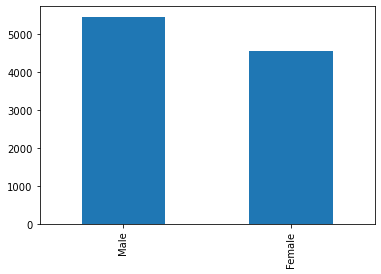

In [110]:
df['Gender'].value_counts().plot(kind='bar');

In [111]:
# doing one hot encoding 
df1 = pd.DataFrame(pd.get_dummies(df['Gender'],drop_first=True))

- Here 1 = Female and 0 = Male

In [112]:
#concatinating
df = pd.concat([df,df1],axis=1)

In [113]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [114]:
#dropping the gender col
df.drop(['Gender'],axis=1,inplace=True)

In [115]:
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


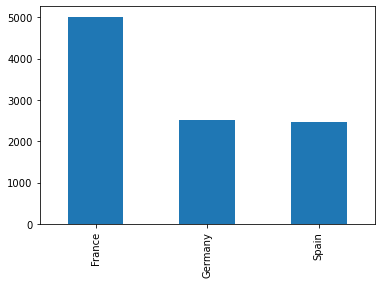

In [116]:
# checking the Geography col
df['Geography'].value_counts().plot(kind='bar');

In [117]:
df2 = pd.DataFrame(pd.get_dummies(df['Geography'],drop_first=True))

In [118]:
#concatinating
df = pd.concat([df,df2],axis=1)

In [119]:
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [120]:
#dropping 
df.drop(['Geography'],axis=1,inplace=True)

In [121]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


- Now every single col is numerical.

CreditScore
skewness: -0.07160660820092675


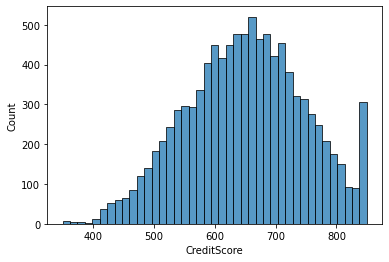

Age
skewness: 1.0113202630234552


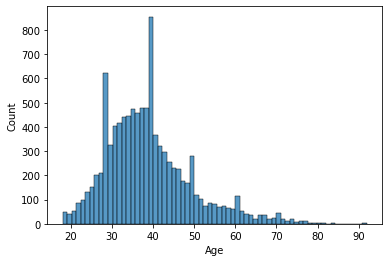

Tenure
skewness: 0.01099145797717904


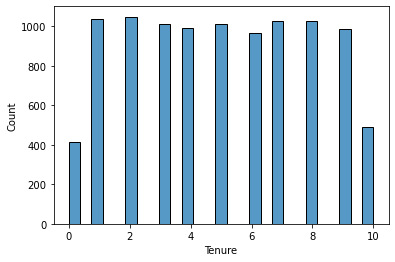

Balance
skewness: -0.14110871094154384


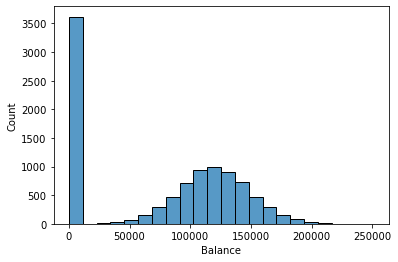

EstimatedSalary
skewness: 0.0020853576615585162


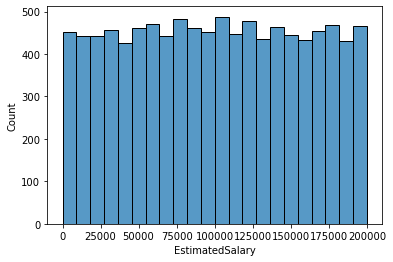

In [122]:
#making histogram for numerical col
num_col = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

for i in num_col:
    print(i)
    print('skewness:',df[i].skew())
    sns.histplot(data=df,x=i)
    plt.show()

- EstimatedSalary, Tenure are normal dist.

## 8. Feature Scaling

In [123]:
X = df.drop('Exited',axis=1)
y = df['Exited']

cols = X.columns

In [124]:
scaler = StandardScaler()

In [125]:
X = scaler.fit_transform(X)

In [126]:
X = pd.DataFrame(X, columns=[cols])

In [127]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-1.095988,-0.578736,-0.573809
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.095988,-0.578736,1.742740
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-1.095988,-0.578736,-0.573809
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.095988,-0.578736,-0.573809
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.095988,-0.578736,1.742740


## 9. Model Training

In [128]:
#splitting the data into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 9.1 Balancing the classes

In [129]:
### Checking if there is imbalance classes
y_train.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

- from this we got to know that there are imbalance classes. Firstly we would have to make it balanced.

In [130]:
#making the classes of data balanced - we can use over sampling technique

oversampling = SMOTE()
X_train,y_train = oversampling.fit_resample(X_train,y_train)

X_test,y_test = oversampling.fit_resample(X_test,y_test)

In [131]:
### Checking if there is imbalance classes
y_train.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

- Now we can see that the classes are balanced.

In [132]:
X_train.shape

(12712, 11)

In [133]:
y_train.shape

(12712,)

In [134]:
X_test.shape

(3214, 11)

In [135]:
y_test.shape

(3214,)

### 9.2 Predict accuracy with different algorithms

In [136]:
names = ["Logistic Regression","Decision Tree","Random Forest", "Gradient Boosting", "XGBoost" ]

In [137]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

In [138]:
accuracy_scores = []
for name,clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    score = round(clf.score(X_test,y_test),4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.7349
Decision Tree  :  0.7971
Random Forest  :  0.7878
Gradient Boosting  :  0.8858
XGBoost  :  0.9011


- The accuracy is high for the algorithm 'XGBoost'

## 10. Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

1. True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

2. True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

3. False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

4. False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix.

We will use the XGBoost Classifier to plot the confusion-matrix.

In [139]:
#since we got better accuracy for xgboost, hence we will make a classifier on it.
xgb_clf = xgb.XGBClassifier()

In [140]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [141]:
# predict on the test set
y_pred = xgb_clf.predict(X_test)

In [142]:
#getting to know the scores
print('XGBoost Classifier model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost Classifier model accuracy score: 0.9011


In [143]:
#printing the confusion matrixs
cm = confusion_matrix(y_test,y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1502  105]
 [ 213 1394]]

True Positives(TP) =  1502

True Negatives(TN) =  1394

False Positives(FP) =  105

False Negatives(FN) =  213


- The confusion matrix shows 1557 + 175 = 1732 correct predictions and 50 + 218 = 268 incorrect predictions.

<AxesSubplot:>

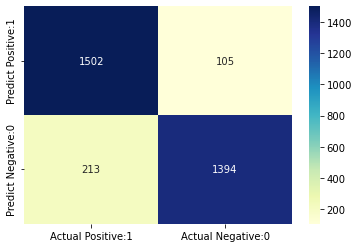

In [144]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 11. Classification Metrices
### 11.1 Classification Report

Classification Report is another way to evaluate the classification model performance.
It displays the precision, recall, f1 and support scores for the model.
We can print a classification report as follows:-

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1607
           1       0.93      0.87      0.90      1607

    accuracy                           0.90      3214
   macro avg       0.90      0.90      0.90      3214
weighted avg       0.90      0.90      0.90      3214



In [146]:
# iterate over classifiers and calculate cross-validation score
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
    print(name , ':{:.4f}'.format(scores.mean()))

Logistic Regression :0.7091
Decision Tree :0.7851
Random Forest :0.7693
Gradient Boosting :0.8637
XGBoost :0.9012


## 12. Results and Conclusion

In this project, we build an ML model to predict the churn-rate of the customer.

- Germany has higher exit rate.
- Majority of the people are leaving the bank when they have more numbers of services from bank.Also Germany has high rate.
- On an average when a person is reaching the age of 45, they are likely to withdraw the services.
- There are no missing values in the dataset.
- RowNumber, CustomerId and Surname have no predictive power. So, we have dropped them from the dataset.
- There are two categorical variables - Gender and Geography. We have converted them into numerical variable.
- We have trained the model with different algorithms and compare their accuracy.
- XGBoost fared better than other algorithms and resulted in maximum accuracy of 0.90.
- We find the most important feature as Age and least important feature as Gender.